# Binary search

### What is binary search: 

Binary search is a search algorithm that finds the position of a **target** value within a **sorted** array. 
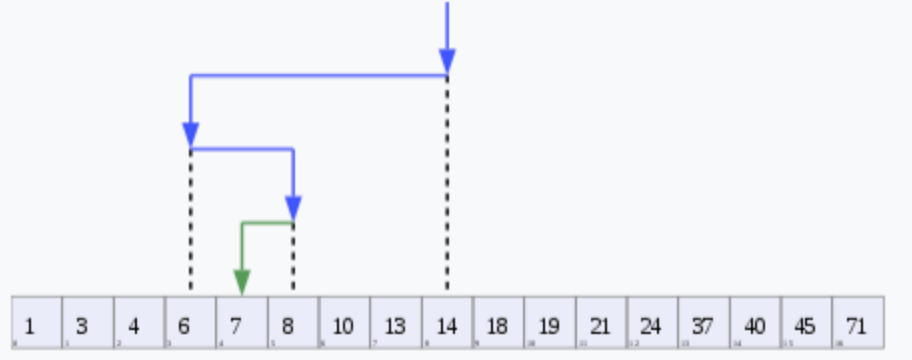

Question: 
Leetcode: 704. [Binary Search](https://leetcode.com/problems/binary-search/) 
Laicode: 14. Classical Binary Search 

Given an array of integers nums which is sorted in ascending order, and an integer target, write a function to search target in nums. If target exists, then return its index. Otherwise, return -1.

You must write an algorithm with O(log n) runtime complexity.

Input: nums = [-1,0,3,5,9,12], target = 9
Output: 4
Explanation: 9 exists in nums and its index is 4

In [13]:
import numpy as np 

nums = [-1,0,3,5,9,12] 
l = 0 
r = len(nums) - 1 

print(r) 
# in python, // results in a floored integer. 
print('//: ', r//2) 
# / results in a float number. 
print('/:', r/2)

print(1//2)

5
//:  2
/: 2.5
0


## exact target
- l <= r
- mid = l + (r - l) // 2

In [8]:
class Solution:
    def search(self, nums, target: int) -> int:
        # corner case 
        if nums is None or len(nums) == 0: 
            return -1 
        
        # set L to 0 and R to n-1 
        l = 0 
        r = len(nums) - 1 
        
        # terminate condition: l > r  
        # key point: l <= r, mid = l + (r - l) // 2 
        while (l <= r): 
            # assign mid 
            mid = l + (r - l) // 2 
            
            if nums[mid] == target: 
                return mid 
            elif nums[mid] < target: 
                # eliminate lower half 
                l = mid + 1 
            else: 
                # eliminate higher half 
                r = mid - 1
        
        # if no target: return -1 
        return -1 



In [12]:
a = Solution() 
nums = [-1,0,3,5,9,12] 
target = 3
a.search(nums, target)

2

## 267. Search In Sorted Matrix I (Laicode) 
74. [Search a 2D Matrix](https://leetcode.com/problems/search-a-2d-matrix/) (Leetcode)

Write an efficient algorithm that searches for a value target in an m x n integer matrix matrix. This matrix has the following properties:

Integers in each row are sorted from left to right.
The first integer of each row is greater than the last integer of the previous row.

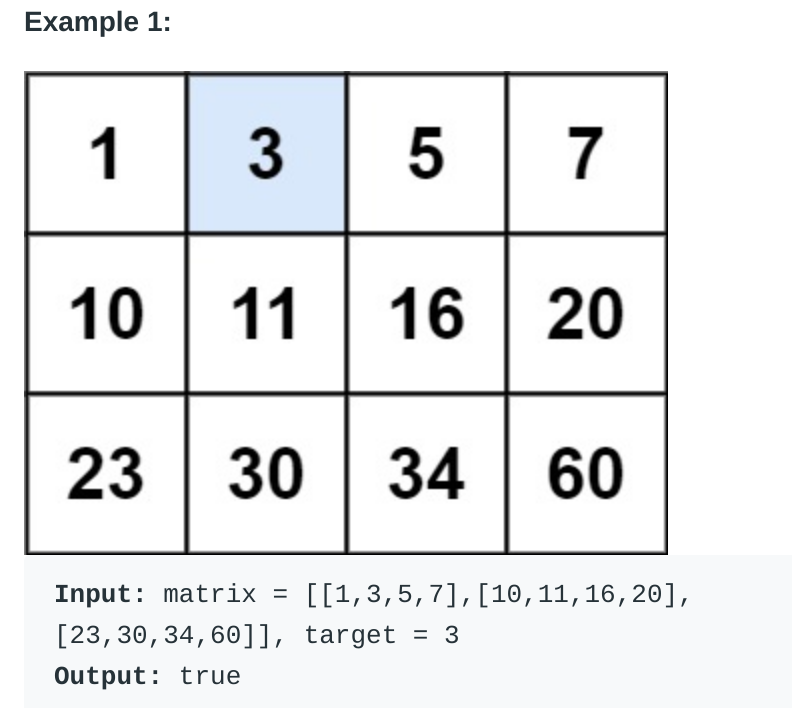


- key point: 
    - row_idx = idx_1d // len_col; col_idx = idx_1d % len_col 
    - We perform binary search in 1D index space of the matrix. Then, we map the 1D index to 2D using the fomulas above to access the element in the 2D matrix. 
    - For binary search problems, we can say that there are two different parts that function differently. The first is index operation, i.e., to move the left and right index around to reduce the search space. The second is target comparison, i.e., to use the index to access the element in the array and then compare to the target value. In this problem, the only difference is the way we use index to access the elements of the 2D matrix. Specifically, we map the 1-D index to 2-D indices, which is used to access the middle element.  
    - This can be generalized to any cases. The first step is to perform search space reduction in 1-D index space. The second step is to use a mapping function $M$ to map the 1-D index space to other space of interest. In 1-d array case, $M: i \rightarrow i$, while in 2-d case, $M: i \rightarrow (r, c)$. We can also define different $M$s depend on the problems we want to solve.  

In [15]:
class Solution:
    def searchMatrix(self, matrix, target):
        # corner case 
        if matrix is None or len(matrix) == 0: 
            return False 
        
        # set l to 0 and r to mn - 1 
        len_row = len(matrix)
        len_col = len(matrix[0])
        l = 0 
        r = len(matrix) * len(matrix[0]) - 1 
        
        # binary search 
        while (l <= r): 
            # assign mid 
            mid = l + (r - l) // 2 
            cur_mid = matrix[mid//len_col][mid%len_col] 
            if cur_mid == target: 
                return True 
            elif cur_mid < target: 
                l = mid + 1 
            else: 
                r = mid - 1 
        
        return False     

In [16]:
matrix = [[1,3,5,7],[10,11,16,20],[23,30,34,60]] 
target = 3 
a = Solution() 

a.searchMatrix(matrix=matrix, target=target)  


True

## 17. Closest In Sorted Array 
Leetcode: Not found. 
Given a target integer T and an integer array A sorted in ascending order, find the index i in A such that A[i] is closest to T.

Assumptions

There can be duplicate elements in the array, and we can return any of the indices with same value.

Examples

A = {1, 2, 3}, T = 2, return 1 

A = {1, 4, 6}, T = 3, return 1

A = {1, 4, 6}, T = 5, return 1 or 2

A = {1, 3, 3, 4}, T = 2, return 0 or 1 or 2

Corner Cases

What if A is null or A is of zero length? We should return -1 in this case.

Key points: 
- left < right-1: two elements remain 
- left = mid and right = mid. avoid dead code.  

In [34]:
class Solution(object):
    def closest(self, array, target):
        # corner case 
        if array is None or len(array) == 0: 
            return -1 
        
        # set l to 0 and r to n-1 
        l = 0 
        r = len(array) - 1 
        # binary search  
        while (l < r-1): 
            mid = l + (r - l) // 2 
            if array[mid] == target: 
                return mid 
            elif array[mid] < target: 
                l = mid # not mid + 1 
            else: 
                r = mid  # not mid - 1 
            print('mid:', mid, 'left:', l, 'right:', r)

        
        return r if abs(array[r] - target) <= abs(array[l] - target) else l   
    
a = Solution() 
# array = [1, 4, 6]
array = [1, 4, 4, 5, 6]
# array = [1, 4, 6]

target = 5
a.closest(array=array, target=target)

mid: 2 left: 2 right: 4


3

In [26]:
abs(3+5)

8